In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = Path.cwd().parents[1] / "data"

In [3]:
features_df = pd.read_csv(data_dir / "training_set_features.csv", index_col = 0)
labels_df = pd.read_csv(data_dir / "training_set_labels.csv", index_col = 0)

In [4]:
print("features_df.shape:", features_df.shape)
features_df.head()

features_df.shape: (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
print("labels_df.shape:", labels_df.shape)
labels_df.head()

labels_df.shape: (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [6]:
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

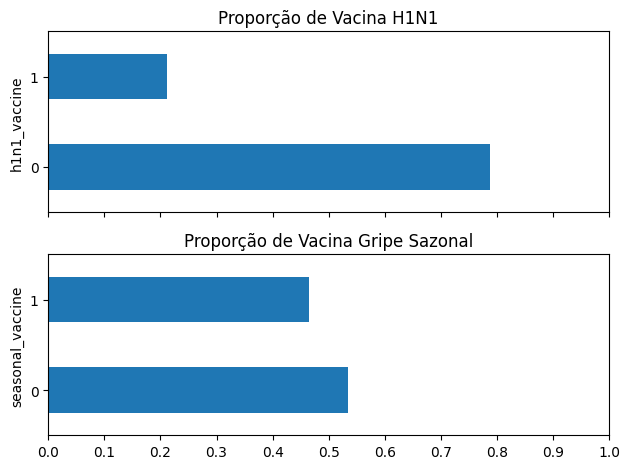

In [7]:
fig, ax = plt.subplots(2, 1, sharex = True)

(labels_df["h1n1_vaccine"]
 .value_counts(normalize=True)
 .plot.barh(ax=ax[0], title="Proporção de Vacina H1N1"))

(labels_df["seasonal_vaccine"]
 .value_counts(normalize=True)
 .plot.barh(ax=ax[1], title="Proporção de Vacina Gripe Sazonal"))
for a in ax:
    a.set_xlim(0.0, 1.0)
    a.set_xticks(np.arange(0.0, 1.01, 0.1)) 

fig.tight_layout()

In [8]:
pd.crosstab(labels_df["h1n1_vaccine"], labels_df["seasonal_vaccine"], margins = True, normalize=True)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [9]:
x = list(labels_df["h1n1_vaccine"])
y = list(labels_df["seasonal_vaccine"])

np.corrcoef(x, y)

array([[1.        , 0.37714265],
       [0.37714265, 1.        ]])

In [10]:
joined_df = features_df.join(labels_df)
print(joined_df.shape)
joined_df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [11]:
counts = (
    joined_df[["h1n1_concern", "h1n1_vaccine"]]
    .groupby(["h1n1_concern", "h1n1_vaccine"])
    .size()
    .unstack("h1n1_vaccine")
)
counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


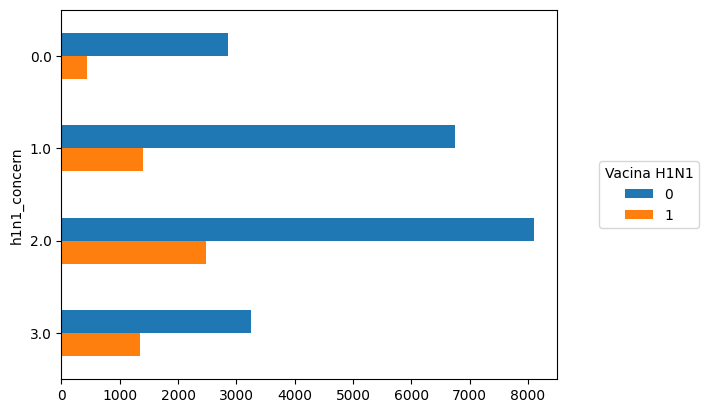

In [12]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(loc = "center right", bbox_to_anchor = (1.3, 0.5), title = "Vacina H1N1")

In [13]:
h1n1_concern_counts = counts.sum(axis = "columns")
h1n1_concern_counts

h1n1_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [14]:
props = counts.div(h1n1_concern_counts, axis = "index")
props

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


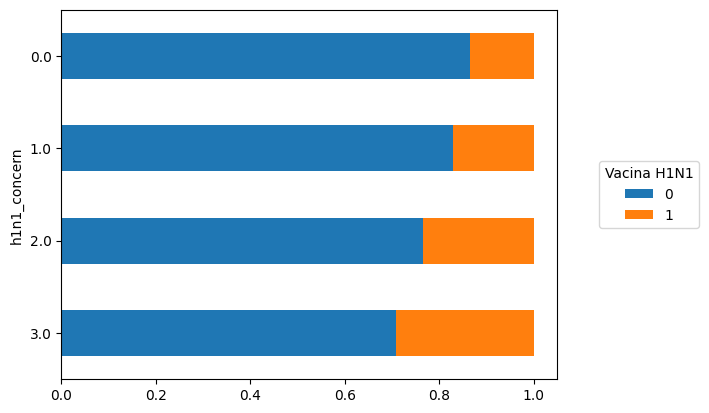

In [15]:
ax = props.plot.barh(stacked = True)
ax.invert_yaxis()
ax.legend(loc = "center right", bbox_to_anchor = (1.3, 0.5), title = "Vacina H1N1")

In [16]:
def vaccination_rate_plot(col, target, data, ax = None):
    counts = joined_df[[target, col]].groupby([target, col]).size().unstack(target)
    group_counts = counts.sum(axis = "columns")
    props = counts.div(group_counts, axis = "index")

    props.plot(kind="barh", stacked=True, ax = ax)
    ax.invert_yaxis()
    ax.legend().remove()

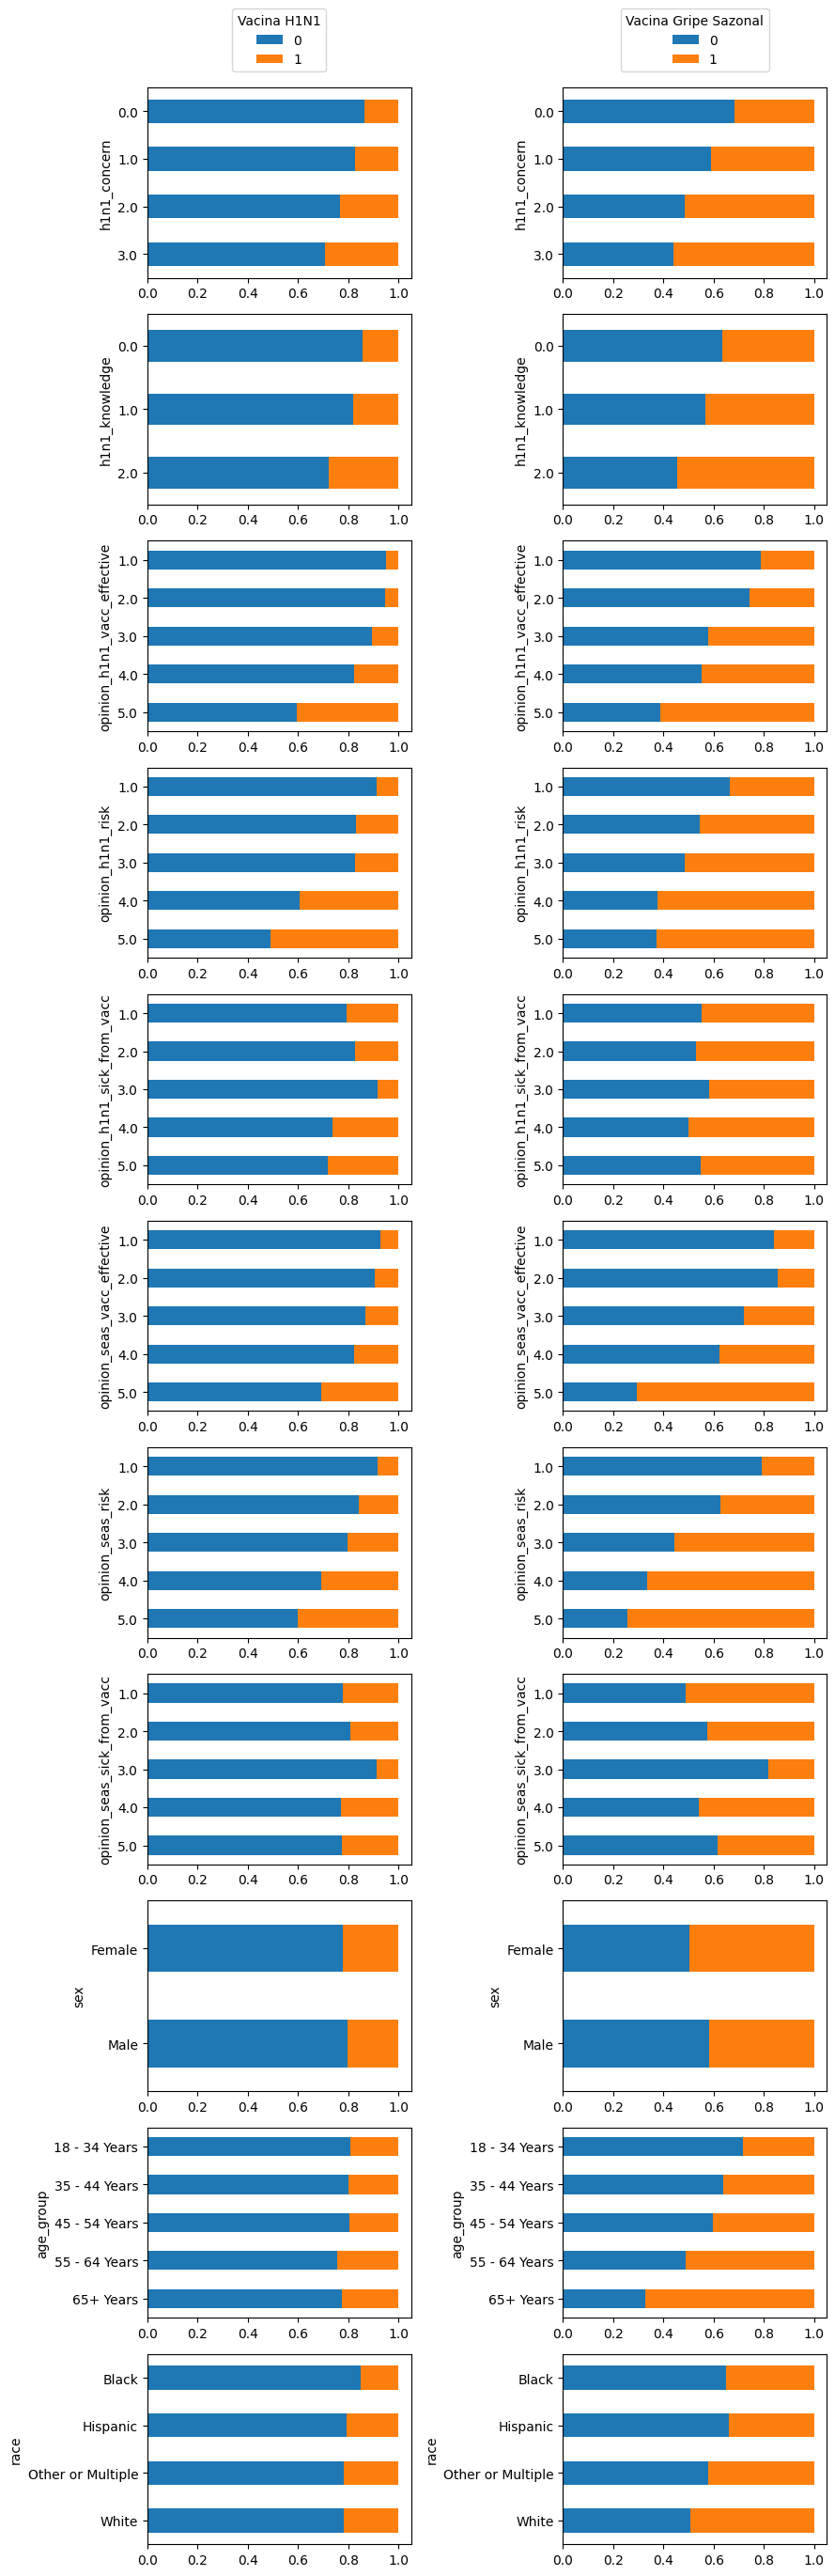

In [17]:
cols_to_plot = [
    "h1n1_concern",
    "h1n1_knowledge",
    "opinion_h1n1_vacc_effective",
    "opinion_h1n1_risk",
    "opinion_h1n1_sick_from_vacc",
    "opinion_seas_vacc_effective",
    "opinion_seas_risk",
    "opinion_seas_sick_from_vacc",
    "sex",
    "age_group",
    "race"
]

fig, ax = plt.subplots(len(cols_to_plot), 2, figsize = (9, len(cols_to_plot) * 2.5))
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(col, "h1n1_vaccine", joined_df, ax = ax[idx, 0])
    vaccination_rate_plot(col, "seasonal_vaccine", joined_df, ax = ax[idx, 1])

ax[0, 0].legend(loc = "lower center", bbox_to_anchor = (0.5, 1.05), title = "Vacina H1N1")
ax[0, 1].legend(loc = "lower center", bbox_to_anchor = (0.5, 1.05), title = "Vacina Gripe Sazonal")
fig.tight_layout()